## Hydrology 


### Contribution to discharge

- discharge (obs vs sim)
- base flow 
- lateral flow 
- runoff
- drainage

In [1]:
import numpy as np
# from helpers import get_data
# from constants_v1 import *
# Plotting
import pandas as pd
from helpers_pd import *
pd.options.mode.chained_assignment = None  # default='warn'
import seaborn as sns
# plt.style.use('seaborn-white')
sns.set(style="darkgrid")
import matplotlib.pyplot as plt

In [2]:
# Observations
path = '../phd-model-process/'
obs_q = pd.read_table(path + 'observations/q_out_cal.tss')


In [3]:
obs_q.head()

,Jdays,Qm3
0,177,28.678
1,178,28.655
2,179,28.440
3,180,30.559
4,181,29.590


In [4]:
gen1x = "Gen10"
df1 = get_data(gen=gen1x)
df1["Gen"] = gen1x
df = pd.concat([df1, 
#                 df2
               ])
len(df)

2910

In [5]:
# Index names
df['Name'] = df['Gen'] + "/" + df.index
df = df.set_index('Name')

In [6]:
# For later, 'KGE-d13C_out', 'NSE-d13C_out'
dfs = df[['Model', 'Gen',
          'z3_factor',
          'cZ0Z1',
          'cZ',
          'c_adr',
          'k_g',
          'gamma01',
          'gammaZ',
          'f_transp',
          'f_evap',
          'f_oc',
          'k_oc',
          'beta_runoff',
          'dt_50_aged',
          'dt_50_ab',
          'dt_50_ref',
          'epsilon_iso',
          'beta_moisture',
          'KGE-CONC-tra', 'KGE-d13C-tra',
          'KGE-CONC-blk', 'KGE-d13C-blk',
          'KGE-CONC-det', 'KGE-d13C-det',
          'KGE-Q_out', 'KGE-CONC_out', 'KGE-d13C_out',
          'MAE-CONC_out', 'MAE-d13C_out',
          'NSE-CONC_out', 'NSE-Q_out',
          'BIAS-CONC_out', 'BIAS-d13C_out',
          'BIAS-LDS_out',
          'BIAS-Q_out'
          ]]

In [18]:
ff_out = dfs.loc[(dfs['KGE-Q_out'] > 0.5) &(dfs['KGE-CONC-blk'] > .79) & (dfs['KGE-d13C-blk'] > .87)] # Soils
var_list = ff_out.index[(ff_out['Model'] == 'var')].tolist() #[0]
# var_list = ff_out.index.tolist() #[0]
print(len(ff_out), len(var_list))

(1, 1)


In [14]:
sim_name = var_list[0]
sim_name

'Gen10/LHS_sc3var61/24/'

In [19]:
tss = ["resW_accQ_m3.tss", # Q sim
       "resW_outLatflow_m3.tss",  # Outlet latflow (m3)
       "resW_accRunoff_m3.tss",  # Runoff (m3)
       "resW_accDrain_m3.tss",  # Drainage (m3)
       "resW_accBaseflow_m3.tss"  # Baseflow, linear reservoir (m3)
      ] 

names = ['Q Sim.', 
         'LF Sim.', 
         'ROFF Sim.', 
         'Drain Sim.', 
         'BF Sim.'
        ]

palette = ['blue', 'purple', 'rgb(178,223,138)', '#F44336', '#3F51B5', 'orange']

col = "sim"
data = []
data.append(obs_q)
for i in range(len(tss)):  # Append simulated components
    filename = tss[i]
    sim_pd = pd.read_table(path + sim_name + filename, 
                            skiprows=4, delim_whitespace=True,
                            names=['Jdays', names[i]],
                            header=None)
    
    data.append(sim_pd)

df = reduce(lambda left, right: pd.merge(left, right, on='Jdays'), data)

In [20]:
df.head()

,Jdays,Qm3,Q Sim.,LF Sim.,ROFF Sim.,Drain Sim.,BF Sim.
0,177,28.678,38.3315,0.342602,0.000000,0.0,37.9889
1,178,28.655,38.7802,0.519067,0.281445,0.0,37.9797
2,179,28.440,38.3716,0.401435,0.000000,0.0,37.9702
3,180,30.559,38.2566,0.296146,0.000000,0.0,37.9605
4,181,29.590,38.3721,0.421531,0.000000,0.0,37.9506


In [21]:
dm_simp = pd.melt(df, 
                 id_vars=['Jdays'
                         ],
#              value_vars=['z3_factor',
#                          'cZ0Z1',
#                          'cZ',
#                          'c_adr',
#                          'k_g',
#                          'gamma01',
#                          'gammaZ',
#                          'f_transp',
#                          'f_evap',
#                          'f_oc',
#                          'k_oc',
#                          'k_d',
#                          'beta_runoff',
#                          'dt_50_aged',
#                          'dt_50_ab',
#                          'dt_50_ref',
#                          'epsilon_iso',
#                          'beta_moisture']
                 )

In [22]:
dm_simp.head()

,Jdays,variable,value
0,177,Qm3,28.678
1,178,Qm3,28.655
2,179,Qm3,28.440
3,180,Qm3,30.559
4,181,Qm3,29.590


In [24]:
%matplotlib notebook

<IPython.core.display.Javascript object>


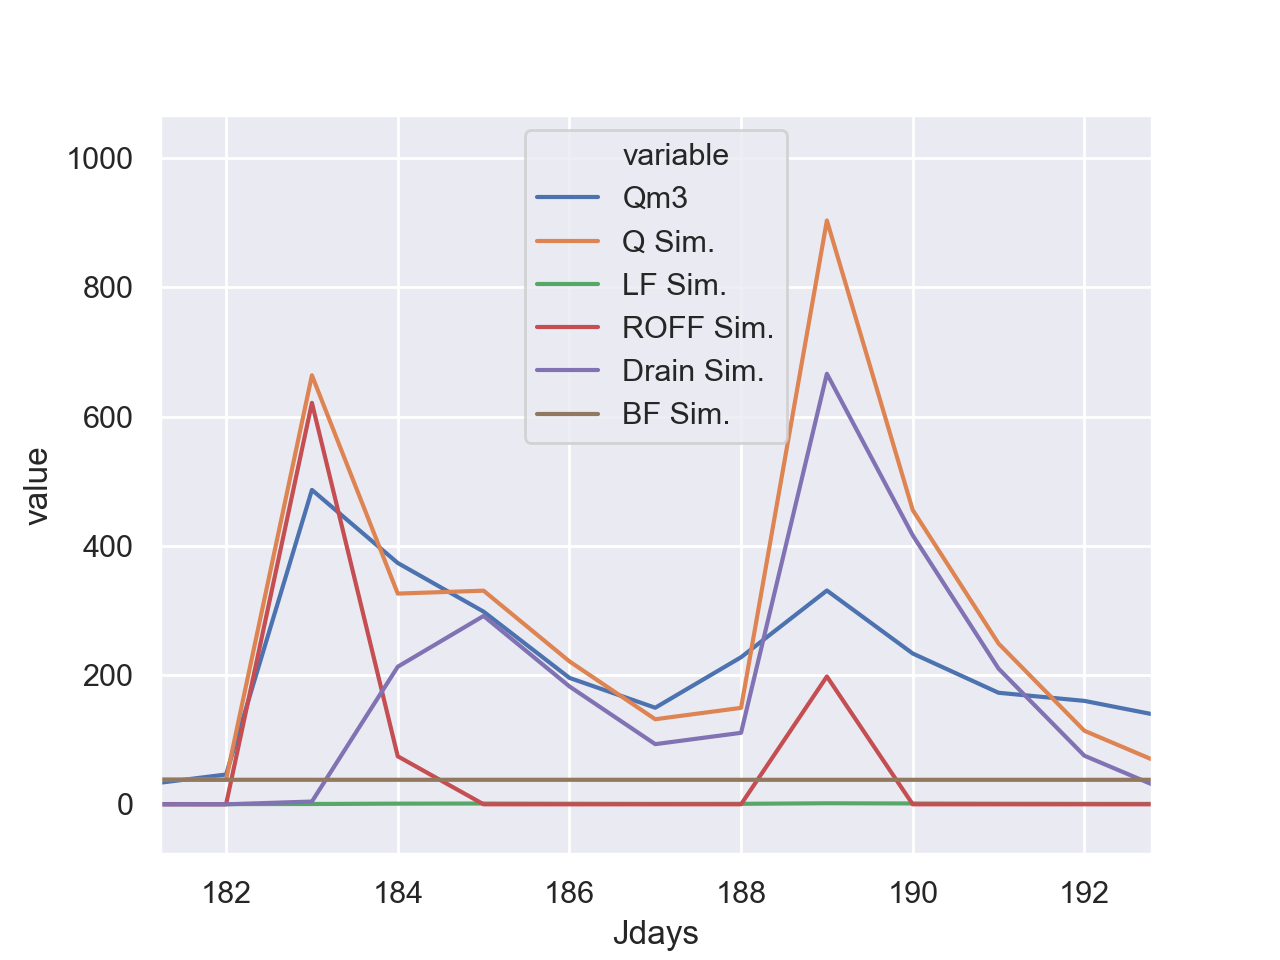

In [25]:
# Plot the responses for different events and regions
sns.lineplot(x="Jdays", y="value",
             hue="variable", 
#              style="event",
             data=dm_simp)

In [33]:
7000. - 2100. - 600. + 420 - 5400.

-680.0